In [26]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
import matplotlib.pyplot as plt

# Import the style from Matplotlib.
from matplotlib import style

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month = "06"
session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
#  3. Convert the June temperatures to a list.
month = "06"
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month)

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results, columns=['date','temperature'])
june_df.set_index(june_df['date'], inplace=True)

In [13]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = "12"
session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [16]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month)

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results, columns=['date','temperature'])
dec_df.set_index(dec_df['date'], inplace=True)

In [18]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [19]:
# Additional Queries
# June Rain
month = "06"
results = []
results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == month)

june_rain_df = pd.DataFrame(results, columns=['date','june precipitation'])
june_rain_df.set_index(june_rain_df['date'], inplace=True)
june_rain_df.describe()

,june precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [20]:
# December Rain
month = "12"
results = []
results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == month)

dec_rain_df = pd.DataFrame(results, columns=['date','december precipitation'])
dec_rain_df.set_index(dec_rain_df['date'], inplace=True)
dec_rain_df.describe()

,december precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [21]:
# Function to calculate Avg, Max, and Min for each month
def temp_stats(m):
    results = []
    results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == m)
    month_df = pd.DataFrame(results, columns=['date','temperature'])
    month_df.set_index(month_df['date'], inplace=True)
    stats = (m, month_df['temperature'].mean(), month_df['temperature'].max(), month_df['temperature'].min())
    
    return stats

In [22]:
# Running each month through the function and adding to a list
jan = temp_stats('01')
feb = temp_stats('02')
mar = temp_stats('03')
apr = temp_stats('04')
may = temp_stats('05')
jun = temp_stats('06')
jul = temp_stats('07')
aug = temp_stats('08')
sep = temp_stats('09')
oct = temp_stats('10')
nov = temp_stats('11')
dec = temp_stats('12')
year_stats = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]
year_stats

[('01', 68.72611464968153, 81.0, 54.0),
 ('02', 69.44223602484472, 83.0, 56.0),
 ('03', 70.05906674542233, 82.0, 56.0),
 ('04', 72.35726795096322, 84.0, 53.0),
 ('05', 73.68090017311022, 87.0, 63.0),
 ('06', 74.94411764705882, 85.0, 64.0),
 ('07', 76.08240794856809, 87.0, 61.0),
 ('08', 76.41245376078915, 87.0, 65.0),
 ('09', 76.16486486486487, 87.0, 64.0),
 ('10', 75.3913881748072, 86.0, 64.0),
 ('11', 73.25268817204301, 83.0, 61.0),
 ('12', 71.04152933421226, 83.0, 56.0)]

In [24]:
# Converting list to a DF
labels = ['month','avg temp','high temp','low temp']
year_df = pd.DataFrame.from_records(year_stats, columns=labels)
year_df.set_index(year_df['month'], inplace=True)
year_df

,month,avg temp,high temp,low temp
month,,,,
01,01,68.726115,81.0,54.0
02,02,69.442236,83.0,56.0
03,03,70.059067,82.0,56.0
04,04,72.357268,84.0,53.0
05,05,73.680900,87.0,63.0
06,06,74.944118,85.0,64.0
07,07,76.082408,87.0,61.0
08,08,76.412454,87.0,65.0
09,09,76.164865,87.0,64.0


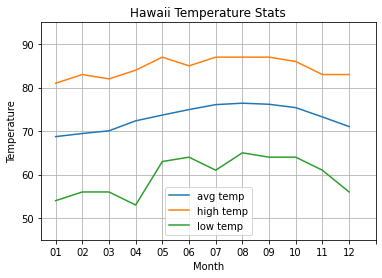

In [27]:
# Graphing Results
year_df.plot.line(xticks= [0,1,2,3,4,5,6,7,8,9,10,11,12], ylim=[45,95])
plt.title("Hawaii Temperature Stats")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.grid()